# Pandas

## Część I

Będziemy przetwarzać dane z Kaggle odnośnie imion dzieci w USA.

Krok 0: wczytaj pandas

In [2]:
import pandas as pd

Krok 1: wczytaj dane z pliku `US_Baby_Names_right.csv` z katalogu `lab12_files`

In [3]:
df = pd.read_csv("./lab12_files/US_Baby_Names_right.csv")
display(df.head())

,Unnamed: 0,Id,Name,Year,Gender,State,Count
0,11349,11350,Emma,2004,F,AK,62
1,11350,11351,Madison,2004,F,AK,48
2,11351,11352,Hannah,2004,F,AK,46
3,11352,11353,Grace,2004,F,AK,44
4,11353,11354,Emily,2004,F,AK,41


Krok 2: przypisz dane do zmiennej `baby_names`. Zobacz jakiego typu dane są przechowywane i ile jest rekordów

In [4]:
baby_names = df
# display(baby_names.head())
records_num = len(baby_names)
columns_types = baby_names.dtypes
print("> number of records: \n", records_num)
print("> columns types: \n", columns_types)

> number of records: 
 1016395
> columns types: 
 Unnamed: 0     int64
Id             int64
Name          object
Year           int64
Gender        object
State         object
Count          int64
dtype: object


Krok 3: podejrzy pierwszych 10 rekordów ze zbioru

In [5]:
baby_names.head(10)

,Unnamed: 0,Id,Name,Year,Gender,State,Count
0,11349,11350,Emma,2004,F,AK,62
1,11350,11351,Madison,2004,F,AK,48
2,11351,11352,Hannah,2004,F,AK,46
3,11352,11353,Grace,2004,F,AK,44
4,11353,11354,Emily,2004,F,AK,41
5,11354,11355,Abigail,2004,F,AK,37
6,11355,11356,Olivia,2004,F,AK,33
7,11356,11357,Isabella,2004,F,AK,30
8,11357,11358,Alyssa,2004,F,AK,29
9,11358,11359,Sophia,2004,F,AK,28


Krok 4: usuń kolumny 'Unnamed: 0' oraz 'Id' 

In [6]:
baby_names = baby_names.drop(columns=['Unnamed: 0', 'Id'])
baby_names.head()

,Name,Year,Gender,State,Count
0,Emma,2004,F,AK,62
1,Madison,2004,F,AK,48
2,Hannah,2004,F,AK,46
3,Grace,2004,F,AK,44
4,Emily,2004,F,AK,41


Krok 5: czy w zbiorze jest więcej imion kobiet, czy mężczyzn?

In [7]:
print(baby_names['Gender'].unique())
print("num of women: ", len(baby_names[baby_names['Gender'] == "M"]))
print("num of men: ", len(baby_names[baby_names['Gender'] == "F"]))

['F' 'M']
num of women:  457549
num of men:  558846


Krok 6: zgrupuj wiersze względem imion i wypisz 10 najczęściej pojawiających się imion.

In [8]:
grouped = baby_names.groupby('Name')
grouped.count().Count.nlargest(10)

Name
Riley     1112
Avery     1080
Jordan    1073
Peyton    1064
Hayden    1049
Taylor    1033
Jayden    1031
Alexis     984
Payton     971
Angel      962
Name: Count, dtype: int64

In [30]:
top_names = baby_names.Name.value_counts().nlargest(10)

Krok 7: wyniki z Kroku 6 zaprezentuj na wykresie korzystając z `matplotlib`. Przygotuj trzy wykresy, tj. 10 najczęsciej występujących imion: ogółem, u mężczyzn i u kobiet.

In [15]:
womens_top_names = baby_names[baby_names['Gender'] == "F"].Name.value_counts().nlargest(10)
mens_top_names = baby_names[baby_names['Gender'] == "M"].Name.value_counts().nlargest(10)

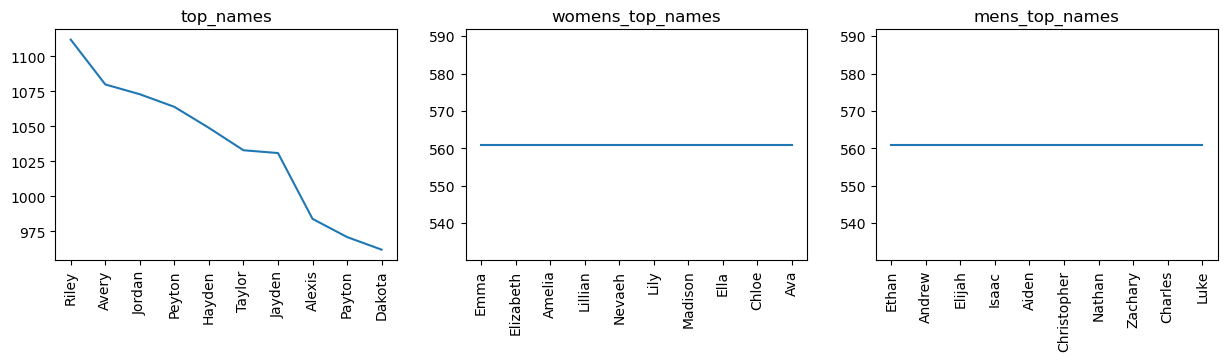

In [63]:
fig, axs = plt.subplots(1, 3, figsize=(15,3))
axs[0].plot(top_names)
axs[0].set_title('top_names')
axs[1].plot(womens_top_names)
axs[1].set_title('womens_top_names')
axs[2].plot(mens_top_names)
axs[2].set_title('mens_top_names')
for ax in axs:
    ax.tick_params(axis='x', labelrotation=90)
plt.show()

Krok 8: Jak wiele różnych imion występuje w zbiorze?

In [62]:
print("number of names: ", len(baby_names['Name'].unique()))

number of names:  17632


Krok 9: Przygotuj generator imion, losujący je zgodnie z rozkłądem prawdopodobieństwa otrzymanym na podstawie przetwarzanego pliku

In [66]:
import random

def name_generator_from_dataframe(dataframe):
    name_probabilities = []
    
    for name, probability in dataframe.iterrows():
        name_probabilities.extend([name] * probability.values[0])
    
    while True:
        yield random.choice(name_probabilities)

# Example usage:
# Assuming your DataFrame looks like this:
# df = pd.DataFrame({'Probability': [100, 80, 120]}, index=['Adam', 'Ewa', 'Jan'])

generator = name_generator_from_dataframe(top_names)

# Generating names:
for _ in range(10):
    print(next(generator))

Jayden
Jordan
Avery
Avery
Hayden
Avery
Dakota
Riley
Alexis
Peyton


Krok 10: 
- Jakie imie występuje najczęściej?
- Wyznacz średnią, medianę i odchylenie stanadrdowe wystepowania imion.

In [64]:
print(baby_names.Name.value_counts().nlargest(1))
top_names.describe()

Riley    1112
Name: Name, dtype: int64


,Name
count,10.00000
mean,1035.90000
std,49.96988
min,962.00000
25%,995.75000
50%,1041.00000
75%,1070.75000
max,1112.00000


## Część II

Krok 1: Wczytaj dane

Krok 2: Podejrzyj pierwsze 25 rekordów

Krok 3: Podejrzyj ostatnie 10 rekordów

Krok 4: Ile jest obserwacji w zbiorze? Ile jest kolumn w zbiorze?

Krok 5: Wypisz nazwy kolumn

Krok 6: Ile różnych zawodów jest w zbiorze?

Krok 7: Przygotuj efektywny wykres na którym przedstawisz procetowy udział poszczególnych zawodów w zbiorze na charplocie
Wykorzystaj https://matplotlib.org/examples/pie_and_polar_charts/pie_demo_features.html

Przygotuj dwa wykresy: 
- jeden z wszystkimi zawodami
- drugi z 10 najcześtrzymi zawodami, pozostałem zawody trafiają do kategorii `Inne`

Krok 8: Przygotuj efektywny wykres na którym przedstawisz 10 najczęstrzych zawodów oraz ile pracuje w nich kobiet a ilu meżczyzn
Wykorzystaj https://matplotlib.org/gallery/api/barchart.html#sphx-glr-gallery-api-barchart-py

Krok 9: Przygotuj efektywny wykres na którym przedstawisz średni wiek pracowników danego zawodu

Krok 10: Przygotuj efektywny wykres na którym przedstawisz średni wiek kobiet i mężczyzn wykonujących dany zawód.